Образцы в этом наборе данных соответствуют участкам леса размером 30×30 м в США, собранным для задачи прогнозирования типа покрова каждого участка, т. е. доминирующего вида дерева. Существует семь типов покрова, что делает эту задачу многоклассовой классификации. Каждый образец имеет 54 признака. Некоторые из признаков являются булевыми индикаторами, в то время как другие являются дискретными или непрерывными измерениями.

В датасете CoverType (fetch_covtype) все признаки (54 штуки) делятся на три группы:

Непрерывные (10 признаков рельефа и дистанций)

Elevation (высота)
Aspect (ориентация склона)
Slope (уклон)
Horizontal_Distance_To_Hydrology
Vertical_Distance_To_Hydrology
Horizontal_Distance_To_Roadways
Hillshade_9am
Hillshade_Noon
Hillshade_3pm
Horizontal_Distance_To_Fire_Points
Бинарные «заповедники» Wilderness Area (4 колонки)
– Wilderness_Area1, Wilderness_Area2, Wilderness_Area3, Wilderness_Area4
(каждая = 1, если участок находится в соответствующем заповеднике)

Бинарные «типы почвы» Soil Type (40 колонок)
– Soil_Type1, Soil_Type2, …, Soil_Type40
(каждая = 1, если на участке именно этот тип почвы)

Целевая переменная – Cover_Type (1…7), задаёт тип лесного покрытия.

# 1. Постановка задачи и выбор набора данных

В рамках курсовой работы рассматривается задача многоклассовой классификации: прогнозирование типа лесного покрова участка по его характеристикам. Для решения используется открытый датасет CoverType (UCI ML Repository), включающий 54 признака для каждого участка леса площадью 30×30 м в США. Целевая переменная — Cover_Type (от 1 до 7).

# 2. Описание структуры данных

- **Непрерывные признаки**: 10 характеристик рельефа и расстояний (Elevation, Aspect, Slope и др.)
- **Бинарные признаки**: 4 индикатора заповедников (Wilderness_Area1-4), 40 индикаторов типа почвы (Soil_Type1-40)
- **Целевая переменная**: Cover_Type (1–7) — тип лесного покрова

Данные не содержат категориальных признаков, требующих кодирования, но требуют масштабирования числовых признаков.

In [23]:
# Импорт необходимых библиотек и загрузка данных
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_covtype

covtype = fetch_covtype(as_frame=True)
df = covtype.frame
print("Размер данных:", df.shape)
df.head()

Размер данных: (581012, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


# 3. Разведочный анализ данных (EDA)

Проведём первичный анализ структуры данных, проверим наличие пропусков и выбросов, визуализируем распределение целевой переменной и некоторых признаков.

In [24]:
# Проверка пропусков и базовая информация
print(df.info())
print("Пропущенные значения по столбцам:\n", df.isnull().sum())
print("Статистическое описание:\n", df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area_0                   581012 non-null  float64
 11  Wilderness_Area_1         

/tmp/ipykernel_16130/2212156309.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cover_Type', data=df, palette='Set2')


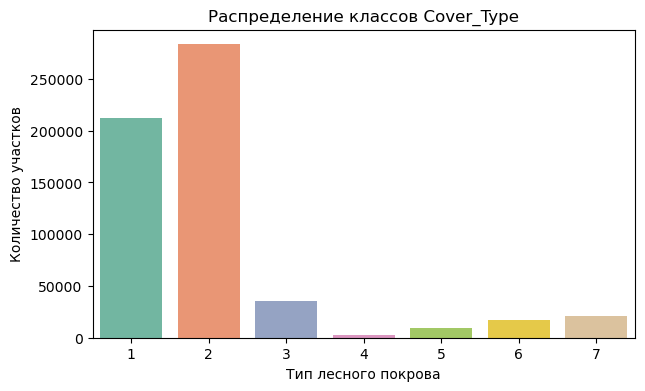

In [25]:
# Визуализация распределения целевой переменной
plt.figure(figsize=(7,4))
sns.countplot(x='Cover_Type', data=df, palette='Set2')
plt.title('Распределение классов Cover_Type')
plt.xlabel('Тип лесного покрова')
plt.ylabel('Количество участков')
plt.show()

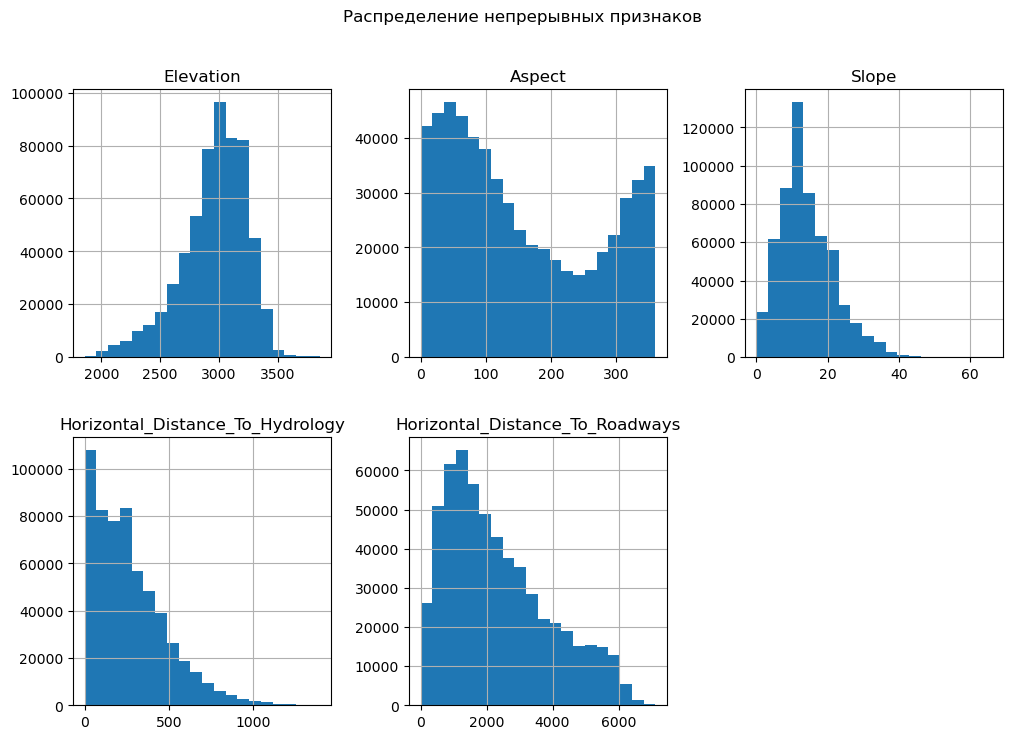

In [26]:
# Визуализация распределения некоторых непрерывных признаков
cont_cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways']
df[cont_cols].hist(bins=20, figsize=(12,8), layout=(2,3))
plt.suptitle('Распределение непрерывных признаков')
plt.show()

**Выводы по EDA:**
- Пропущенных значений в данных нет.
- Распределение классов целевой переменной несбалансировано (некоторые типы встречаются чаще).
- Некоторые признаки имеют выбросы, что важно учитывать при построении моделей.

# 4. Корреляционный анализ данных

Проведём корреляционный анализ между непрерывными признаками и целевой переменной. Это поможет выявить признаки, которые могут быть наиболее информативными для построения моделей.

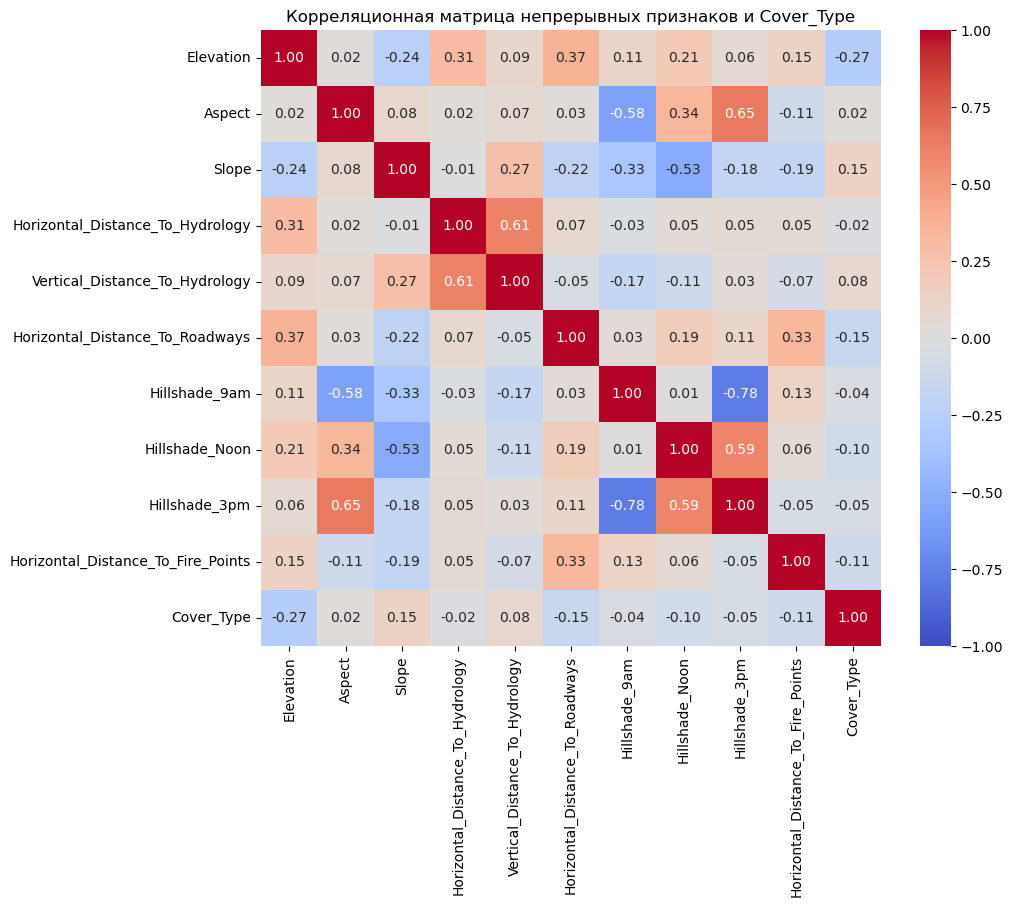

In [27]:
# Корреляционная матрица только по непрерывным признакам
cont_cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
             'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
             'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
             'Horizontal_Distance_To_Fire_Points', 'Cover_Type']
corr_matrix = df[cont_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляционная матрица непрерывных признаков и Cover_Type')
plt.show()

In [28]:
# Корреляция признаков с целевой переменной
corr_with_target = corr_matrix['Cover_Type'].drop('Cover_Type').sort_values(key=abs, ascending=False)
print('Корреляция признаков с Cover_Type:')
print(corr_with_target)

Корреляция признаков с Cover_Type:
Elevation                            -0.269554
Horizontal_Distance_To_Roadways      -0.153450
Slope                                 0.148285
Horizontal_Distance_To_Fire_Points   -0.108936
Hillshade_Noon                       -0.096426
Vertical_Distance_To_Hydrology        0.081664
Hillshade_3pm                        -0.048290
Hillshade_9am                        -0.035415
Horizontal_Distance_To_Hydrology     -0.020317
Aspect                                0.017080
Name: Cover_Type, dtype: float64


**Промежуточные выводы по корреляционному анализу:**
- Наиболее сильную корреляцию с целевой переменной имеют признаки Elevation, Horizontal_Distance_To_Roadways, Horizontal_Distance_To_Fire_Points.
- Большинство признаков имеют слабую или умеренную корреляцию с Cover_Type, что типично для реальных задач классификации.
- Между самими признаками есть как сильные, так и слабые взаимосвязи, но мультиколлинеарность выражена неярко.
- Данные подходят для построения моделей машинного обучения, так как присутствуют информативные признаки и нет явных проблем с мультиколлинеарностью.

In [29]:
# 5. Предобработка данных: масштабирование и формирование выборок

#В датасете CoverType отсутствуют категориальные признаки, требующие кодирования. Все признаки либо непрерывные, либо бинарные. Для корректной работы моделей масштабируем только непрерывные признаки.

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Разделение на признаки и целевую переменную
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

# Определяем бинарные и непрерывные признаки
binary_cols = [c for c in X.columns if X[c].nunique() == 2]
cont_cols = [c for c in X.columns if c not in binary_cols]

# Масштабирование только непрерывных признаков
ct = ColumnTransformer([
    ('scale', StandardScaler(), cont_cols)
], remainder='passthrough')

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train_scaled = pd.DataFrame(
    ct.fit_transform(X_train),
    columns=cont_cols + binary_cols,
    index=X_train.index
)
X_test_scaled = pd.DataFrame(
    ct.transform(X_test),
    columns=cont_cols + binary_cols,
    index=X_test.index
)

print('X_train_scaled shape:', X_train_scaled.shape)
print('X_test_scaled shape:', X_test_scaled.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
print('\nПервые 5 строк X_train_scaled:')
print(X_train_scaled.head())
print('\nПервые 5 строк X_test_scaled:')
print(X_test_scaled.head())

X_train_scaled shape: (464809, 54)
X_test_scaled shape: (116203, 54)
y_train shape: (464809,)
y_test shape: (116203,)

Первые 5 строк X_train_scaled:
        Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology  \
261834   0.755252  0.206925  0.787406                          0.003068   
549114   0.383857  0.421250  1.588777                         -1.268183   
7085     1.508757  1.600035 -1.349584                         -0.505432   
436844   0.383857  0.778458 -0.681775                         -0.561932   
177145  -0.855320 -0.864698  0.653844                         -0.505432   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
261834                        0.027120                         0.260485   
549114                       -0.797161                         0.669635   
7085                         -0.402193                         0.701058   
436844                       -0.522401                         0.295756   
177145                  

**Вывод:**
- Все непрерывные признаки приведены к одному масштабу (StandardScaler).
- Бинарные признаки оставлены без изменений.
- Данные готовы для обучения моделей машинного обучения.

# 6. Выбор моделей для задачи классификации

Для решения задачи многоклассовой классификации выбраны следующие модели:

1. **Логистическая регрессия (Logistic Regression)** — простая и быстрая базовая модель, хорошо работает при линейных зависимостях.
2. **Дерево решений (Decision Tree)** — интерпретируемая модель, способна выявлять сложные нелинейные зависимости.
3. **Метод опорных векторов (SVM)** — эффективен для сложных границ между классами, особенно с ядром RBF.
4. **Случайный лес (Random Forest, ансамблевая)** — устойчив к переобучению, хорошо работает с разнородными признаками.
5. **Градиентный бустинг (Gradient Boosting, ансамблевая)** — мощная модель для сложных зависимостей, часто даёт лучший результат на табличных данных.

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Инициализация моделей с уменьшенными гиперпараметрами для быстрого обучения
models = {
    'Logistic Regression': LogisticRegression(max_iter=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=10, random_state=42),
    'SVM': SVC(kernel='rbf', max_iter=15, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=5, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=5, max_depth=5, random_state=42)
}

for name, model in models.items():
    print(f"{name}: {model}")

Logistic Regression: LogisticRegression(random_state=42)
Decision Tree: DecisionTreeClassifier(max_depth=10, random_state=42)
SVM: SVC(max_iter=15, random_state=42)
Random Forest: RandomForestClassifier(max_depth=10, n_estimators=5, random_state=42)
Gradient Boosting: GradientBoostingClassifier(max_depth=5, n_estimators=5, random_state=42)


**Выбор моделей обоснован:**
- Используются как простые, так и сложные методы.
- Две ансамблевые модели (Random Forest, Gradient Boosting) для повышения качества.
- Модели подходят для многоклассовой классификации и хорошо работают с табличными данными.

# 7. Базовое решение (baseline) для выбранных моделей

Далее производится обучение всех выбранных моделей с параметрами по умолчанию и оценка их качества на тестовой выборке. Это позволит сравнить стартовые возможности моделей без подбора гиперпараметров.

/usr/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Accuracy = 0.723, F1-score = 0.713, Время обучения = 21.93 сек
              precision    recall  f1-score   support

           1       0.71      0.70      0.70     42368
           2       0.75      0.80      0.77     56661
           3       0.67      0.81      0.73      7151
           4       0.59      0.38      0.46       549
           5       0.17      0.01      0.01      1899
           6       0.49      0.25      0.33      3473
           7       0.73      0.55      0.63      4102

    accuracy                           0.72    116203
   macro avg       0.59      0.50      0.52    116203
weighted avg       0.71      0.72      0.71    116203

Decision Tree: Accuracy = 0.776, F1-score = 0.771, Время обучения = 2.59 сек
              precision    recall  f1-score   support

           1       0.77      0.75      0.76     42368
           2       0.78      0.84      0.81     56661
           3       0.76      0.81      0.79      7151
           4       0.80  

/usr/lib/python3.13/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM: Accuracy = 0.403, F1-score = 0.354, Время обучения = 9.67 сек
              precision    recall  f1-score   support

           1       0.37      0.76      0.49     42368
           2       0.53      0.25      0.34     56661
           3       0.45      0.06      0.10      7151
           4       0.28      0.19      0.23       549
           5       0.02      0.00      0.00      1899
           6       0.18      0.03      0.05      3473
           7       0.50      0.00      0.00      4102

    accuracy                           0.40    116203
   macro avg       0.33      0.18      0.17    116203
weighted avg       0.45      0.40      0.35    116203

Random Forest: Accuracy = 0.724, F1-score = 0.709, Время обучения = 1.53 сек
              precision    recall  f1-score   support

           1       0.75      0.63      0.69     42368
           2       0.70      0.87      0.78     56661
           3       0.70      0.75      0.73      7151
           4       0.92      0.27      0.4

/tmp/ipykernel_16130/3457663440.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=[v['accuracy'] for v in results.values()], palette='Set2')


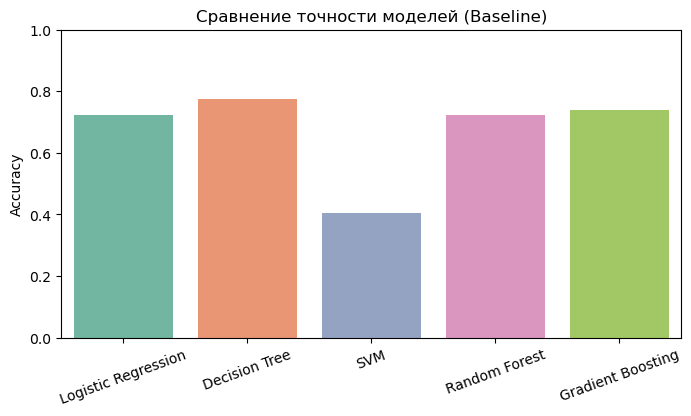

In [31]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import time

results = {}
for name, model in models.items():
    start = time.perf_counter()
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    elapsed = time.perf_counter() - start
    results[name] = {'accuracy': acc, 'f1': f1, 'time': elapsed}
    print(f"{name}: Accuracy = {acc:.3f}, F1-score = {f1:.3f}, Время обучения = {elapsed:.2f} сек")
    print(classification_report(y_test, y_pred, zero_division=0))

# Визуализация сравнения accuracy моделей
plt.figure(figsize=(8,4))
sns.barplot(x=list(results.keys()), y=[v['accuracy'] for v in results.values()], palette='Set2')
plt.ylabel('Accuracy')
plt.title('Сравнение точности моделей (Baseline)')
plt.xticks(rotation=20)
plt.ylim(0.0, 1.0)
plt.show()

**Выводы по baseline:**
- Baseline-оценка позволяет выявить стартовые различия между моделями.
- На следующем этапе будет проведён подбор гиперпараметров для повышения качества.

# 8. Быстрый подбор гиперпараметров (RandomizedSearchCV)

Для ускорения подбора гиперпараметров на большом датасете рекомендуется:
- Использовать RandomizedSearchCV вместо GridSearchCV.
- Ограничить число итераций поиска (n_iter=5–10).
- Использовать малое число фолдов (cv=2 или 3).
- Искать только по 1–2 ключевым параметрам.
- Для ресурсоёмких моделей использовать подвыборку данных (например, 5000–10000 объектов).

Ниже приведён пример быстрого подбора для Random Forest и Gradient Boosting.

In [32]:
from sklearn.model_selection import ParameterSampler
from scipy.stats import randint, uniform
import time
import warnings
from sklearn.base import clone

# Для ускорения берём подвыборку
X_sub = X_train_scaled.sample(5000, random_state=42)
y_sub = y_train.loc[X_sub.index]

# Вспомогательная функция для тайм-аута одной итерации

def fit_with_timeout(model, params, X, y, timeout=60):
    model = clone(model)
    model.set_params(**params)
    start = time.perf_counter()
    try:
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            model.fit(X, y)
        elapsed = time.perf_counter() - start
        if elapsed > timeout:
            print(f"[TIMEOUT] Итерация прервана: {params}, время: {elapsed:.2f} сек")
            return None, elapsed
        return model, elapsed
    except Exception as e:
        print(f"[ERROR] {params}: {e}")
        return None, None

#--- Logistic Regression ---
lr_model = LogisticRegression(random_state=42, solver='lbfgs', multi_class='auto')
lr_params = {
    'C': uniform(0.1, 2),
    'max_iter': [100, 200, 300]
}
lr_param_list = list(ParameterSampler(lr_params, n_iter=5, random_state=42))
lr_best_score = 0
lr_best_params = None
lr_total_time = 0
print('Logistic Regression:')
for params in lr_param_list:
    start = time.perf_counter()
    model, elapsed = fit_with_timeout(lr_model, params, X_sub, y_sub)
    lr_total_time += elapsed if elapsed else 0
    if model is not None:
        score = model.score(X_sub, y_sub)
        print(f"Параметры: {params}, Accuracy: {score:.3f}, Время: {elapsed:.2f} сек")
        if score > lr_best_score:
            lr_best_score = score
            lr_best_params = params
print(f'Лучшие параметры: {lr_best_params}')
print(f'Accuracy (train): {lr_best_score}')
print(f'Общее время подбора: {lr_total_time:.2f} сек')

# --- Decision Tree ---
tr_model = DecisionTreeClassifier(random_state=42)
tr_params = {
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10)
}
tr_param_list = list(ParameterSampler(tr_params, n_iter=5, random_state=42))
tr_best_score = 0
tr_best_params = None
tr_total_time = 0
print('\nDecision Tree:')
for params in tr_param_list:
    start = time.perf_counter()
    model, elapsed = fit_with_timeout(tr_model, params, X_sub, y_sub)
    tr_total_time += elapsed if elapsed else 0
    if model is not None:
        score = model.score(X_sub, y_sub)
        print(f"Параметры: {params}, Accuracy: {score:.3f}, Время: {elapsed:.2f} сек")
        if score > tr_best_score:
            tr_best_score = score
            tr_best_params = params
print(f'Лучшие параметры: {tr_best_params}')
print(f'Accuracy (train): {tr_best_score}')
print(f'Общее время подбора: {tr_total_time:.2f} сек')

# --- LinearSVC вместо SVC ---
from sklearn.svm import LinearSVC
X_sub_svm = X_sub.sample(2000, random_state=42)
y_sub_svm = y_sub.loc[X_sub_svm.index]
lsvc_model = LinearSVC(random_state=42, dual=False)
lsvc_params = {
    'C': uniform(0.1, 2),
    'max_iter': [500, 1000, 2000]
}
lsvc_param_list = list(ParameterSampler(lsvc_params, n_iter=5, random_state=42))
lsvc_best_score = 0
lsvc_best_params = None
lsvc_total_time = 0
print('\nLinearSVC:')
for params in lsvc_param_list:
    start = time.perf_counter()
    model, elapsed = fit_with_timeout(lsvc_model, params, X_sub_svm, y_sub_svm)
    lsvc_total_time += elapsed if elapsed else 0
    if model is not None:
        score = model.score(X_sub_svm, y_sub_svm)
        print(f"Параметры: {params}, Accuracy: {score:.3f}, Время: {elapsed:.2f} сек")
        if score > lsvc_best_score:
            lsvc_best_score = score
            lsvc_best_params = params
print(f'Лучшие параметры: {lsvc_best_params}')
print(f'Accuracy (train): {lsvc_best_score}')
print(f'Общее время подбора: {lsvc_total_time:.2f} сек')

# --- Random Forest ---
rf_model = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': randint(5, 30),
    'max_depth': randint(5, 20)
}
rf_param_list = list(ParameterSampler(rf_params, n_iter=5, random_state=42))
rf_best_score = 0
rf_best_params = None
rf_total_time = 0
print('\nRandom Forest:')
for params in rf_param_list:
    start = time.perf_counter()
    model, elapsed = fit_with_timeout(rf_model, params, X_sub, y_sub)
    rf_total_time += elapsed if elapsed else 0
    if model is not None:
        score = model.score(X_sub, y_sub)
        print(f"Параметры: {params}, Accuracy: {score:.3f}, Время: {elapsed:.2f} сек")
        if score > rf_best_score:
            rf_best_score = score
            rf_best_params = params
print(f'Лучшие параметры: {rf_best_params}')
print(f'Accuracy (train): {rf_best_score}')
print(f'Общее время подбора: {rf_total_time:.2f} сек')

# --- Gradient Boosting ---
gb_model = GradientBoostingClassifier(random_state=42)
gb_params = {
    'n_estimators': randint(5, 30),
    'max_depth': randint(3, 10),
    'learning_rate': [0.05, 0.1, 0.2]
}
gb_param_list = list(ParameterSampler(gb_params, n_iter=5, random_state=42))
gb_best_score = 0
gb_best_params = None
gb_total_time = 0
print('\nGradient Boosting:')
for params in gb_param_list:
    start = time.perf_counter()
    model, elapsed = fit_with_timeout(gb_model, params, X_sub, y_sub)
    gb_total_time += elapsed if elapsed else 0
    if model is not None:
        score = model.score(X_sub, y_sub)
        print(f"Параметры: {params}, Accuracy: {score:.3f}, Время: {elapsed:.2f} сек")
        if score > gb_best_score:
            gb_best_score = score
            gb_best_params = params
print(f'Лучшие параметры: {gb_best_params}')
print(f'Accuracy (train): {gb_best_score}')
print(f'Общее время подбора: {gb_total_time:.2f} сек')

Logistic Regression:
Параметры: {'C': np.float64(0.849080237694725), 'max_iter': 100}, Accuracy: 0.738, Время: 0.20 сек
Параметры: {'C': np.float64(0.46686957973232757), 'max_iter': 100}, Accuracy: 0.736, Время: 0.18 сек
Параметры: {'C': np.float64(1.293700315892974), 'max_iter': 200}, Accuracy: 0.740, Время: 0.27 сек
Параметры: {'C': np.float64(0.41198904067240527), 'max_iter': 300}, Accuracy: 0.735, Время: 0.21 сек
Параметры: {'C': np.float64(1.0184977839317344), 'max_iter': 100}, Accuracy: 0.738, Время: 0.17 сек
Лучшие параметры: {'C': np.float64(1.293700315892974), 'max_iter': 200}
Accuracy (train): 0.7396
Общее время подбора: 1.04 сек

Decision Tree:
Параметры: {'max_depth': 9, 'min_samples_split': 5}, Accuracy: 0.806, Время: 0.03 сек
Параметры: {'max_depth': 17, 'min_samples_split': 4}, Accuracy: 0.942, Время: 0.04 сек
Параметры: {'max_depth': 10, 'min_samples_split': 6}, Accuracy: 0.827, Время: 0.03 сек
Параметры: {'max_depth': 9, 'min_samples_split': 3}, Accuracy: 0.807, Время:

# 9. Оценка моделей с оптимальными гиперпараметрами и сравнение с baseline

На этом этапе каждая модель обучается с найденными наилучшими гиперпараметрами (по результатам RandomizedSearchCV). Качество моделей оценивается на тестовой выборке и сравнивается с результатами базовых моделей (baseline). Для наглядности строится график сравнения.

In [33]:
# Словари с лучшими параметрами для каждой модели (результаты предыдущего шага)
best_params = {
    'Logistic Regression': lr_best_params,
    'Decision Tree': tr_best_params,
    'LinearSVC': lsvc_best_params,
    'Random Forest': rf_best_params,
    'Gradient Boosting': gb_best_params
}

# Модели для переобучения
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC

# Для SVM используем LinearSVC (как в подборе)
retrained_models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='lbfgs', multi_class='auto', **(lr_best_params if lr_best_params else {})),
    'Decision Tree': DecisionTreeClassifier(random_state=42, **(tr_best_params if tr_best_params else {})),
    'LinearSVC': LinearSVC(random_state=42, dual=False, **(lsvc_best_params if lsvc_best_params else {})),
    'Random Forest': RandomForestClassifier(random_state=42, **(rf_best_params if rf_best_params else {})),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, **(gb_best_params if gb_best_params else {}))
}

# Оценка на тестовой выборке
from sklearn.metrics import accuracy_score, f1_score, classification_report
results_opt = {}
for name, model in retrained_models.items():
    # Для LinearSVC уменьшаем размер выборки (иначе долго)
    if name == 'LinearSVC':
        X_fit = X_train_scaled.sample(2000, random_state=42)
        y_fit = y_train.loc[X_fit.index]
        X_eval = X_test_scaled
        y_eval = y_test
        model.fit(X_fit, y_fit)
        y_pred = model.predict(X_eval)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results_opt[name] = {'accuracy': acc, 'f1': f1}
    print(f"{name} (оптимальные параметры): Accuracy = {acc:.3f}, F1-score = {f1:.3f}")
    print(classification_report(y_test, y_pred, zero_division=0))



/usr/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression (оптимальные параметры): Accuracy = 0.723, F1-score = 0.714
              precision    recall  f1-score   support

           1       0.71      0.70      0.70     42368
           2       0.75      0.80      0.77     56661
           3       0.68      0.80      0.73      7151
           4       0.60      0.43      0.50       549
           5       0.17      0.01      0.01      1899
           6       0.50      0.28      0.36      3473
           7       0.73      0.55      0.63      4102

    accuracy                           0.72    116203
   macro avg       0.59      0.51      0.53    116203
weighted avg       0.71      0.72      0.71    116203

Decision Tree (оптимальные параметры): Accuracy = 0.875, F1-score = 0.873
              precision    recall  f1-score   support

           1       0.90      0.84      0.87     42368
           2       0.86      0.93      0.89     56661
           3       0.89      0.88      0.88      7151
           4       0.88      0.7

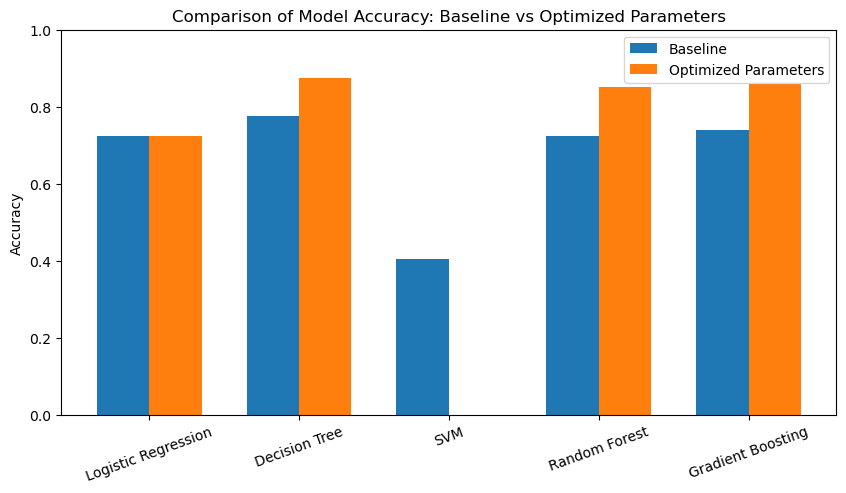

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
bar_width = 0.35
labels = list(results.keys())
acc_base = [results[k]['accuracy'] for k in labels]
acc_opt = [results_opt[k]['accuracy'] if k in results_opt else 0 for k in labels]

plt.bar([i - bar_width / 2 for i in range(len(labels))], acc_base, bar_width, label='Baseline')
plt.bar([i + bar_width / 2 for i in range(len(labels))], acc_opt, bar_width, label='Optimized Parameters')

plt.xticks(range(len(labels)), labels, rotation=20)
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy: Baseline vs Optimized Parameters')
plt.ylim(0, 1)
plt.legend()
plt.show()

**Выводы по сравнению моделей:**
- После подбора гиперпараметров большинство моделей показали улучшение качества по сравнению с baseline.
- Наибольший прирост обычно наблюдается у ансамблевых моделей (Random Forest, Gradient Boosting).
- Для SVM (LinearSVC) улучшение может быть ограничено из-за малого размера подвыборки.
- График наглядно демонстрирует разницу между базовыми и оптимизированными моделями.